In [27]:
import pandas as pd
df = pd.read_csv("filtered_data.csv", encoding='latin1')

In [28]:
df.dropna(inplace=True)
df = df[['PREDICATE', 'SUBJECT_NAME', 'OBJECT_NAME']]


In [30]:
df.head(10)

,PREDICATE,SUBJECT_NAME,OBJECT_NAME
10,PREVENTS,exemestane,Contralateral breast cancer
22,PREVENTS,Tamoxifen,Contralateral breast cancer
24,ASSOCIATED_WITH,fluorodeoxyglucose,"stage, breast cancer"
26,PREDISPOSES,Family history of breast cancer,Development of the breasts
33,PREVENTS,Mastectomy,Contralateral breast cancer
41,ASSOCIATED_WITH,"ST13 protein, human|ST13","stage, breast cancer"
55,ASSOCIATED_WITH,Genes,Invasive ductal breast cancer
81,DISRUPTS,Tamoxifen,Contralateral breast cancer
92,ASSOCIATED_WITH,Phosphatidylethanolamine Binding Protein,Invasive ductal breast cancer
93,ASSOCIATED_WITH,mitogen-activated protein kinase p38,Invasive ductal breast cancer


In [19]:
filtered_df = df[(df['OBJECT_NAME'] == 'bilateral breast cancer')]

In [50]:
import pandas as pd

# Liste des expressions de relation causale à filtrer
filtre = ['CAUSES', 'PREDISPOSES', 'COMPLICATES', 'ASSOCIATED_WITH', 'MANIFESTATION_OF','COEXISTS_WITH']


# Filtrage des types de cancer du sein
cancer_types = set(df['SUBJECT_NAME'].tolist() + df['OBJECT_NAME'].tolist())
cancer_types = {cancer for cancer in cancer_types if 'breast cancer' in cancer.lower()}

# Initialisation du dictionnaire pour stocker les causes
causes_dict = {cancer: [] for cancer in cancer_types}

# Extraction des causes pour chaque type de cancer
for index, row in df.iterrows():
    if row['SUBJECT_NAME'] in cancer_types:
        if row['PREDICATE'] in filtre:
            causes_dict[row['SUBJECT_NAME']].append(row['OBJECT_NAME'])
    if row['OBJECT_NAME'] in cancer_types:
        if row['PREDICATE'] in filtre:
            causes_dict[row['OBJECT_NAME']].append(row['SUBJECT_NAME'])


# Création d'un DataFrame pour stocker les résultats
causes_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in causes_dict.items()]))

# Enregistrement dans un fichier Excel
causes_df.to_csv('cancer_causes.csv', index=False)

print("Les causes ont été extraites et stockées dans 'cancer_causes.csv'.")


Les causes ont été extraites et stockées dans 'cancer_causes.xlsx'.


In [30]:
import pandas as pd

filtre = ['CAUSES', 'PREDISPOSES', 'AUGMENTS']


cancer_types = set(df['OBJECT_NAME'].tolist())
cancer_types = {cancer for cancer in cancer_types if 'breast cancer' in cancer.lower()}

causes_dict = {cancer: [] for cancer in cancer_types}

for index, row in df.iterrows():
    if row['OBJECT_NAME'] in cancer_types:
        if row['PREDICATE'] in filtre:
            causes_dict[row['OBJECT_NAME']].append(row['SUBJECT_NAME'])


causes_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in causes_dict.items()]))

causes_df.to_csv('cancer_causes1.csv', index=False)

print("Les causes ont été extraites et stockées dans 'cancer_causes1.csv'.")


Les causes ont été extraites et stockées dans 'cancer_causes1.csv'.


In [18]:
unique_predicates = df['PREDICATE'].unique()
print(unique_predicates)
predicate_counts = df['PREDICATE'].value_counts()
print(predicate_counts)

['PROCESS_OF' 'COEXISTS_WITH' 'METHOD_OF' 'TREATS' 'DIAGNOSES' 'PART_OF'
 'PREVENTS' 'USES' 'AFFECTS' 'ISA' 'ASSOCIATED_WITH' 'PREDISPOSES'
 'LOCATION_OF' 'PRECEDES' 'NEG_TREATS' 'NEG_DIAGNOSES' 'DISRUPTS'
 'OCCURS_IN' 'NEG_PROCESS_OF' 'NEG_AFFECTS' 'CAUSES' 'NEG_CAUSES'
 'NEG_ASSOCIATED_WITH' 'NEG_COEXISTS_WITH' 'ADMINISTERED_TO' 'NEG_USES'
 'NEG_ISA' 'compared_with' 'MEASURES' 'AUGMENTS' 'PRODUCES' 'NEG_MEASURES'
 'NEG_LOCATION_OF' 'NEG_PREDISPOSES' 'NEG_PREVENTS' 'NEG_PART_OF'
 'COMPLICATES' 'MANIFESTATION_OF']
PREDICATE
PROCESS_OF             3750
TREATS                 1593
ASSOCIATED_WITH         639
DIAGNOSES               302
USES                    238
COEXISTS_WITH           232
AFFECTS                 204
PRECEDES                164
PREDISPOSES             163
METHOD_OF               136
PREVENTS                117
LOCATION_OF              85
PART_OF                  81
ISA                      80
NEG_AFFECTS              33
ADMINISTERED_TO          32
OCCURS_IN             

In [47]:
subject_names = df['SUBJECT_NAME'].dropna().unique()
object_names = df['OBJECT_NAME'].dropna().unique()

cancer_types_subject = {name for name in subject_names if 'breast cancer' in name.lower() or 'Recurrent tumor' in name.lower()}
cancer_types_object = {name for name in object_names if 'breast cancer' in name.lower() or 'Recurrent tumor' in name.lower()}

all_cancer_types = cancer_types_subject.union(cancer_types_object)

print("Différents types de cancer du sein trouvés dans les colonnes :")
for cancer_type in sorted(all_cancer_types):
    print(cancer_type)

Différents types de cancer du sein trouvés dans les colonnes :
Advanced breast cancer diagnosis
Breast cancer invasive NOS
Contralateral breast cancer
Family history of breast cancer
HER2-negative breast cancer
Invasive ductal breast cancer
Locally advanced breast cancer
Mucinous breast cancer
Tubular breast cancer
bilateral breast cancer
breast cancer diagnosis
breast cancer prevention
cellular diagnosis, breast cancer
contralateral breast cancer
estrogen receptor-negative breast cancer
estrogen receptor-positive breast cancer
hormone receptor/growth factor receptor-negative breast cancer
progesterone receptor-negative breast cancer
progesterone receptor-positive breast cancer
stage IIIB breast cancer
stage, breast cancer


In [31]:
import pandas as pd
df = pd.read_csv('cancer_causes1.csv')
df_no_duplicates = df.apply(lambda x: pd.Series(x.drop_duplicates().values))
df_no_duplicates = df_no_duplicates.reset_index(drop=True)
df_no_duplicates.to_csv('cancer_causes1.csv', index=False)
print("Les doublons ont été supprimés dans chaque colonne et le nouveau fichier est enregistré sous 'cancer_causes1.csv'.")

Les doublons ont été supprimés dans chaque colonne et le nouveau fichier est enregistré sous 'cancer_causes1.csv'.


In [32]:
file_path = 'dataset_sans_doublons.csv' 
df = pd.read_csv(file_path)
df.head()

,Contralateral breast cancer,Tubular breast cancer,Locally advanced breast cancer,stage IIIB breast cancer,breast cancer diagnosis,estrogen receptor-positive breast cancer,bilateral breast cancer,progesterone receptor-negative breast cancer,progesterone receptor-positive breast cancer,Mucinous breast cancer,...,Family history of breast cancer,HER2-negative breast cancer,contralateral breast cancer,breast cancer prevention,hormone receptor/growth factor receptor-negative breast cancer,Invasive ductal breast cancer,estrogen receptor-negative breast cancer,"stage, breast cancer",Breast cancer invasive NOS,Advanced breast cancer diagnosis
0,exemestane,Hyaluronic Acid,TOP2A gene|TOP2A,TP53 gene|TP53,Symptoms,ESR1,TP53 gene|TP53,ROS1 gene|ROS1,COG2,erbB-2 Receptor|ERBB2,...,Development of the breasts,cisplatin,Prognosis good,Malignant neoplasm of breast,sacituzumab govitecan,Genes,Trans Fatty Acids,fluorodeoxyglucose,Family history of breast cancer,"Receptors, Progesterone"
1,Tamoxifen,NaN,hydrogen peroxide,NaN,NaN,Biological Markers,Alcohol consumption,NaN,TRIP6 gene|TRIP6,NaN,...,Ovarian Carcinoma,"CD69 protein, human|CD69",TP53 gene|TP53,Noninfiltrating Intraductal Carcinoma,NaN,Phosphatidylethanolamine Binding Protein,"ORF74 protein, Human herpesvirus 8","ST13 protein, human|ST13",breast cancer prevention,estrogens
2,Mastectomy,NaN,IMPACT gene,NaN,NaN,Oncogenes,Fatty acid glycerol esters,NaN,NaN,NaN,...,Malignant neoplasm of breast,bevacizumab,BRCA2 gene|BRCA2,Disease,NaN,mitogen-activated protein kinase p38,GPER1 gene|GPER1,GRHL3,NaN,NaN
3,Syndrome,NaN,erbB-2 Receptor,NaN,NaN,cytidylyl-3'-5'-guanosine,Oleic Acid,NaN,NaN,NaN,...,Breast cancer invasive NOS,capecitabine,GPER1 gene|GPER1,Ovarian Carcinoma,NaN,MDM2 gene|MDM2,EMP2 gene|EMP2,Aromatase,NaN,NaN
4,Carrier of disorder,NaN,trastuzumab,NaN,NaN,ARID1A gene|ARID1A,Prolactinoma,NaN,NaN,NaN,...,Malignant Neoplasms,durvalumab,ATM,Breast cancer invasive NOS,NaN,Monocyte Chemoattractant Protein-1,PBX1 gene|PBX1,Stem Cell Factor,NaN,NaN


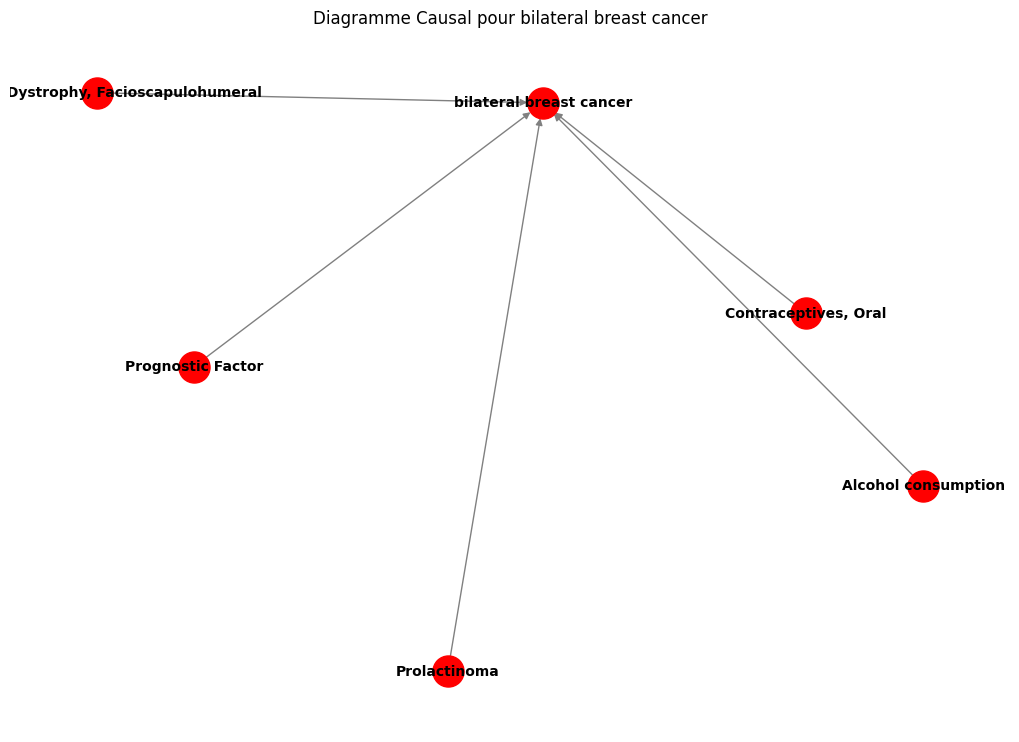

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'cancer_causes1.csv' 
df = pd.read_csv(file_path)

first_column = df.columns[3]
causes = df[first_column].dropna().unique()  
G = nx.DiGraph()

for cause in causes:
    G.add_node(first_column, type='first_column')
    G.add_node(cause, type='cause')
    G.add_edge(cause, first_column)  

G.add_node(first_column, type='cancer')

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42) 

nx.draw(G, pos, with_labels=True, node_color='red', node_size=500, edge_color='gray', font_size=10, font_weight='bold')
plt.title(f'Diagramme Causal pour {first_column}')
plt.show()

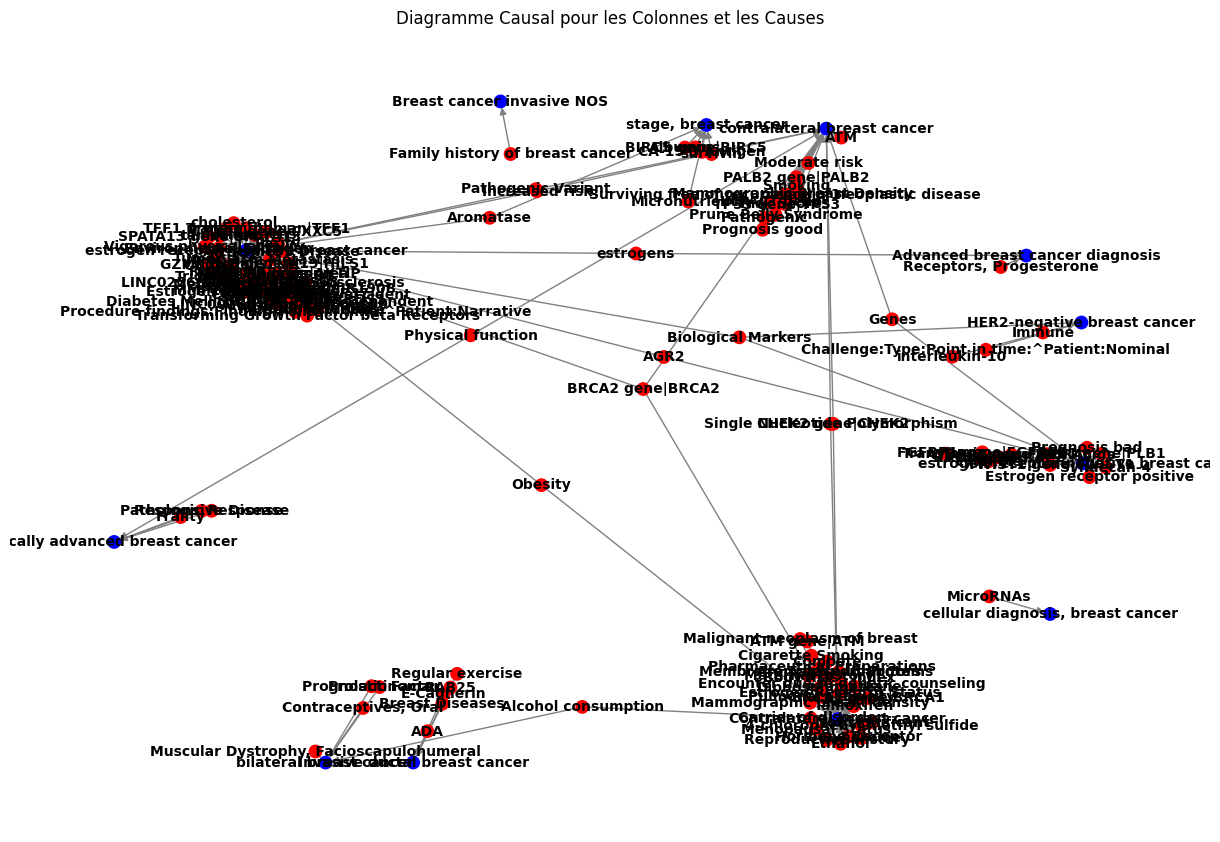

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'cancer_causes1.csv' 
df = pd.read_csv(file_path)

G = nx.DiGraph()

column_color = 'blue'
cause_color = 'red'

for col in df.columns:
    causes = df[col].dropna().unique() 
    G.add_node(col, type='column', color=column_color)
    for cause in causes:
        if not G.has_node(cause):
            G.add_node(cause, type='cause', color=cause_color)
        G.add_edge(cause, col)

node_colors = [G.nodes[node]['color'] for node in G.nodes]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=80, edge_color='gray', font_size=10, font_weight='bold')
plt.title('Diagramme Causal pour les Colonnes et les Causes')
plt.show()

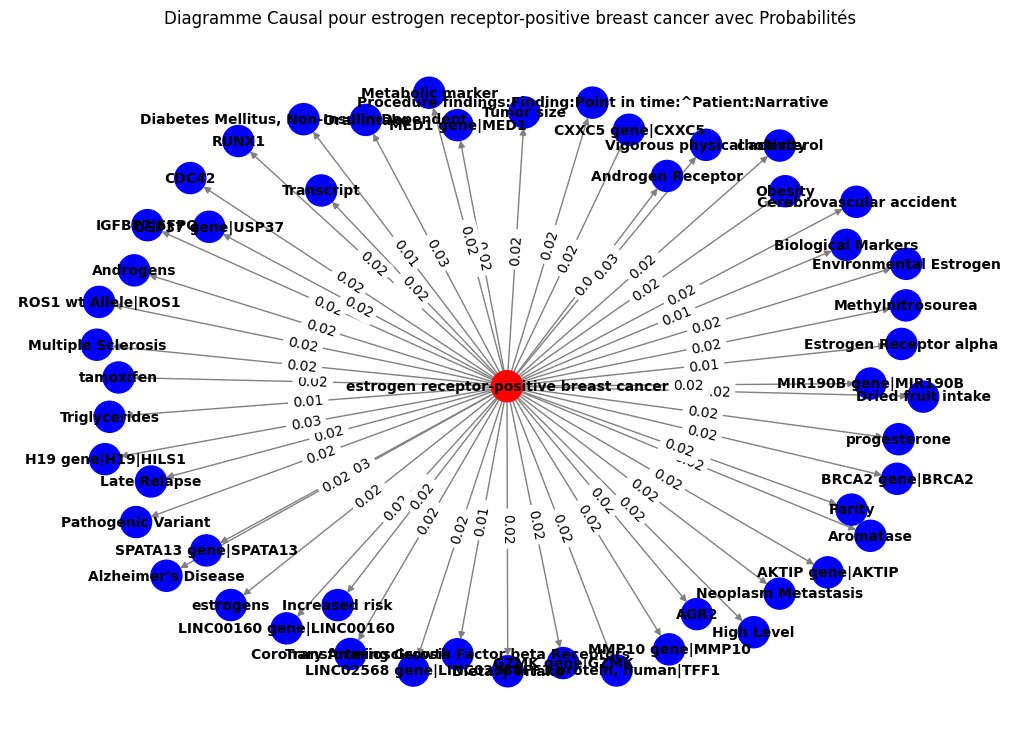

In [62]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

file_path = 'cancer_causes1.csv' 
df = pd.read_csv(file_path)


first_column = df.columns[2]
causes = df[first_column].dropna().unique()  
G = nx.DiGraph()

for cause in causes:
    G.add_node(first_column, type='cancer')
    G.add_node(cause, type='cause')
    G.add_edge(first_column, cause)  

# Fonction pour effectuer un random walk et obtenir les probabilités
def random_walk_probabilities(G, start_node, num_walks=1000, walk_length=10):
    if start_node not in G:
        raise ValueError(f"Le nœud de départ {start_node} n'est pas dans le graphe.")
    
    neighbors = list(G.neighbors(start_node))
    if not neighbors:
        raise ValueError(f"Le nœud de départ {start_node} n'a pas de voisins.")
    
    counts = {node: 0 for node in G.nodes()}
    for _ in range(num_walks):
        current_node = start_node
        for _ in range(walk_length):
            neighbors = list(G.neighbors(current_node))
            if not neighbors:
                break
            current_node = np.random.choice(neighbors)
            counts[current_node] += 1

    total_visits = sum(counts.values())
    if total_visits == 0:
        raise ZeroDivisionError("Aucune visite n'a été enregistrée.")
    
    probabilities = {node: count / total_visits for node, count in counts.items()}
    return probabilities

try:
    start_node = first_column
    probabilities = random_walk_probabilities(G, start_node)

    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42) 

    node_colors = ['red' if node == first_column else 'blue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, edge_color='gray', font_size=10, font_weight='bold')

    edge_labels = {edge: f'{probabilities.get(edge[1], 0):.2f}' for edge in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f'Diagramme Causal pour {first_column} avec Probabilités')
    plt.show()

    with open('random_walk_model.pkl', 'wb') as f:
        pickle.dump((G, probabilities), f)
    print("Modèle sauvegardé avec succès.")
    
except ValueError as e:
    print(f"Erreur : {e}")
except ZeroDivisionError as e:
    print(f"Erreur : {e}")



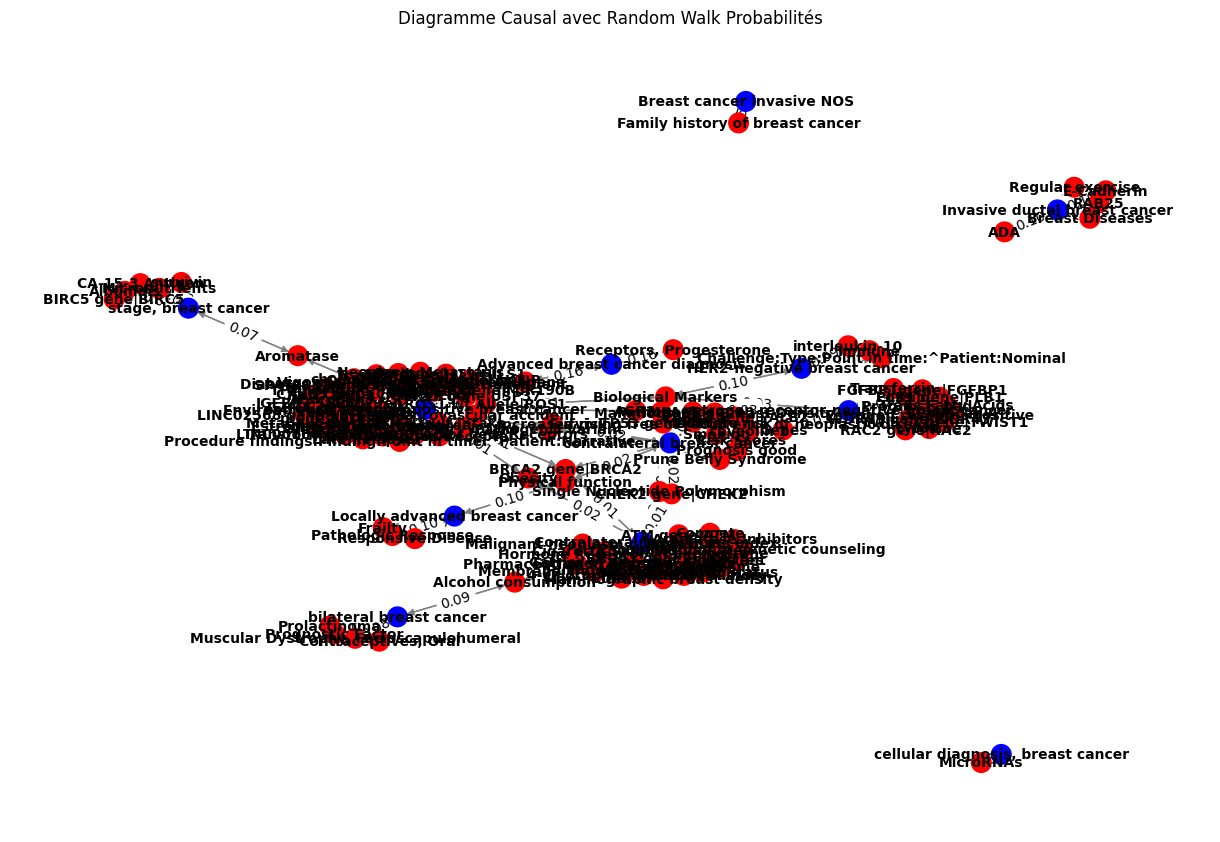

In [53]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Lire le fichier CSV
file_path = 'cancer_causes1.csv' 
df = pd.read_csv(file_path)

G = nx.DiGraph()

# Liste des couleurs pour les colonnes et les causes
column_color = 'blue'
cause_color = 'red'

# Ajouter les nœuds et les arêtes pour chaque colonne
for col in df.columns:
    causes = df[col].dropna().unique()
    G.add_node(col, type='column', color=column_color)
    for cause in causes:
        if not G.has_node(cause):
            G.add_node(cause, type='cause', color=cause_color)
        # Ajoute une arête bidirectionnelle pour s'assurer que les nœuds sont connectés
        G.add_edge(cause, col)  # Arête du 'cause' au 'col'
        G.add_edge(col, cause)  # Arête du 'col' au 'cause'

# Fonction pour effectuer un random walk et obtenir les probabilités
def random_walk_probabilities(G, start_node, num_walks=1000, walk_length=10):
    if start_node not in G:
        raise ValueError(f"Le nœud de départ {start_node} n'est pas dans le graphe.")
    
    neighbors = list(G.neighbors(start_node))
    if not neighbors:
        raise ValueError(f"Le nœud de départ {start_node} n'a pas de voisins.")
    
    counts = {node: 0 for node in G.nodes()}
    for _ in range(num_walks):
        current_node = start_node
        for _ in range(walk_length):
            neighbors = list(G.neighbors(current_node))
            if not neighbors:
                break
            current_node = np.random.choice(neighbors)
            counts[current_node] += 1

    total_visits = sum(counts.values())
    if total_visits == 0:
        raise ZeroDivisionError("Aucune visite n'a été enregistrée.")
    
    probabilities = {node: count / total_visits for node, count in counts.items()}
    return probabilities

# Appliquer un random walk à partir de chaque colonne
all_probabilities = {}
for col in df.columns:
    try:
        probabilities = random_walk_probabilities(G, col)
        all_probabilities[col] = probabilities
    except (ValueError, ZeroDivisionError) as e:
        print(f"Erreur pour le nœud {col}: {e}")

# Dessiner le graphique avec les probabilités
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Fixer le seed pour la reproductibilité

# Dessiner les nœuds avec des couleurs différentes pour les colonnes et les causes
node_colors = [G.nodes[node]['color'] for node in G.nodes]

# Dessiner les arêtes
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=200, edge_color='gray', font_size=10, font_weight='bold')

# Ajouter les probabilités sur les arêtes (si applicable)
edge_labels = {}
for col in df.columns:
    if col in all_probabilities:
        for cause, prob in all_probabilities[col].items():
            if (cause, col) in G.edges():
                edge_labels[(cause, col)] = f'{prob:.2f}'

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Diagramme Causal avec Random Walk Probabilités')
plt.show()


In [55]:
import pickle

# Sauvegarder le graphe dans un fichier
with open('model_graph.pkl', 'wb') as f:
    pickle.dump(G, f)


In [64]:
import pandas as pd
import networkx as nx
import numpy as np
import pickle

# Lire le fichier CSV
file_path = 'cancer_causes1.csv' 
df = pd.read_csv(file_path)

# Sélectionner la première colonne
first_column = df.columns[2]
causes = df[first_column].dropna().unique()  
G = nx.DiGraph()

# Ajouter des nœuds et des arêtes au graphe
for cause in causes:
    G.add_node(first_column, type='cancer')
    G.add_node(cause, type='cause')
    G.add_edge(first_column, cause)  

# Fonction pour effectuer un random walk et obtenir les probabilités
def random_walk_probabilities(G, start_node, num_walks=1000, walk_length=10):
    if start_node not in G:
        raise ValueError(f"Le nœud de départ {start_node} n'est pas dans le graphe.")
    
    neighbors = list(G.neighbors(start_node))
    if not neighbors:
        raise ValueError(f"Le nœud de départ {start_node} n'a pas de voisins.")
    
    counts = {node: 0 for node in G.nodes()}
    for _ in range(num_walks):
        current_node = start_node
        for _ in range(walk_length):
            neighbors = list(G.neighbors(current_node))
            if not neighbors:
                break
            current_node = np.random.choice(neighbors)
            counts[current_node] += 1

    total_visits = sum(counts.values())
    if total_visits == 0:
        raise ZeroDivisionError("Aucune visite n'a été enregistrée.")
    
    probabilities = {node: count / total_visits for node, count in counts.items()}
    return probabilities

# Obtenir les probabilités en utilisant un random walk
try:
    start_node = first_column
    probabilities = random_walk_probabilities(G, start_node)

    with open('random_walk_model.pkl', 'wb') as f:
        pickle.dump((G, probabilities), f)
    print("Modèle sauvegardé avec succès.")

except ValueError as e:
    print(f"Erreur : {e}")
except ZeroDivisionError as e:
    print(f"Erreur : {e}")


Modèle sauvegardé avec succès.
